# Carga un dataset de la libreria `pydataset` 

Puedes elegir la que más te guste! 

Hint: ten en cuenta que os pediremos que hagais algunas transformaciones usando `apply` y `groupby`! 

In [1]:
import pandas as pd
import numpy as np
import datetime
from pydataset import data

#import que vayamos a utilizar. 

pd.options.display.max_columns = None
#me voy a pillar una database que encontré en línea de la trend del DOW Jones y no de pydataset

# Date Pulled: 08/29/2017 11:30pm para poder entender la comparación

In [ ]:
df_dow = pd.read_csv('dowjones.csv',encoding='latin-1') #importante para español!
df_dow.head(2)

# Explora el dataset elegido 

- Cuantas columnas tenemos
- Cuantos nulos
- Haz una descripción
- ¿Puedes homogeneizar el nombre de las columnas?

Tómate tu tiempo para entender el dataframe y la información que hay en el. Y escribe brevemente las conclusiones principales de el dataset elegido. 

**No te olvides de guardar tu nuevo csv limpio**

In [3]:
print(df_dow.columns) #no me gustan las columnas, voy a cambiar y crear otras. 
print(df_dow.isnull().sum()) #ninguno, bien
print(df_dow.describe()) #el describe me ayuda a confirmar las 30 compañias, que es lo que conforma al Dow de por ley. 

Index(['Company', 'Price', 'Volume', 'YTD Change', 'Volume * Price',
       'Total Employees'],
      dtype='object')
Company            0
Price              0
Volume             0
YTD Change         0
Volume * Price     0
Total Employees    0
dtype: int64
       Company     Price   Volume YTD Change    Volume * Price Total Employees
count       30        30       30         30                30              30
unique      30        30       30         30                30              30
top     MMMÊ3M  Ê$202.92  991,291     13.64%  Ê$201,152,769.72          89,800
freq         1         1        1          1                 1               1


In [4]:
#cambio de columnas
df_dow.rename(columns = {'Volume * Price':'Dollar Volume'}, inplace = True)
df_dow.sample() #bien cambiando la columna, pero no me gusta que Dollar Volume y que Price empiecen con E

,Company,Price,Volume,YTD Change,Dollar Volume,Total Employees
14,IBMÊIBM,Ê$143.14,"3,009,520",-13.77%,"Ê$430,782,692.80","386,558"


In [5]:
x = 'Ê$33.50'
x.split('Ê')[1]

'$33.50'

# Crea alguna función y aplícala a tu dataframe usando `apply`

In [6]:
def limpiar_dinero(x):
    billete_string = x.split('Ê')[1]
    return billete_string

In [7]:
#a limpiar y crear nuevas columnas, borrando las anteriores
df_dow['Dollar Volume_'] = df_dow['Dollar Volume'].apply(limpiar_dinero)
df_dow['Price_'] = df_dow['Price'].apply(limpiar_dinero)
df_dow.head()

,Company,Price,Volume,YTD Change,Dollar Volume,Total Employees,Dollar Volume_,Price_
0,MMMÊ3M,Ê$202.92,"991,291",13.64%,"Ê$201,152,769.72","89,800","$201,152,769.72",$202.92
1,AXPÊAmerican Express,Ê$85.42,"2,779,385",15.31%,"Ê$237,415,066.70","62,500","$237,415,066.70",$85.42
2,AAPLÊApple,Ê$162.91,"29,516,910",40.66%,"Ê$4,808,599,808.10","116,000","$4,808,599,808.10",$162.91
3,BAÊBoeing,Ê$240.49,"3,535,465",54.48%,"Ê$850,243,977.85","174,225","$850,243,977.85",$240.49
4,CATÊCaterpillar,Ê$116.01,"4,355,661",25.09%,"Ê$505,300,232.61","95,400","$505,300,232.61",$116.01


In [8]:
#eliminamos las que no quiero
eliminar = ['Price', 'Dollar Volume']

In [9]:
df_dowcl = df_dow.drop(eliminar, axis = 1)
df_dowcl.head()

,Company,Volume,YTD Change,Total Employees,Dollar Volume_,Price_
0,MMMÊ3M,"991,291",13.64%,"89,800","$201,152,769.72",$202.92
1,AXPÊAmerican Express,"2,779,385",15.31%,"62,500","$237,415,066.70",$85.42
2,AAPLÊApple,"29,516,910",40.66%,"116,000","$4,808,599,808.10",$162.91
3,BAÊBoeing,"3,535,465",54.48%,"174,225","$850,243,977.85",$240.49
4,CATÊCaterpillar,"4,355,661",25.09%,"95,400","$505,300,232.61",$116.01


In [10]:
#mmm que belleza pero ya va, que pasa con company!!! como ven, es el ticker+nombre de la compañia, mismo problema con la E

y = 'MMMÊ3M'
print(y.split('Ê')[0])
print(y.split('Ê')[1])

#buenisimo, tengo las 2 cosas que necesito. voy a tener 2 formulas y un apply para la creación de nuevas columnas

MMM
3M


In [11]:
#nombre de compañia limpio

def limpiar_compa(y):
    compa_string = y.split('Ê')[1]
    return compa_string

def limpiar_tick(y):
    tick_string = y.split('Ê')[0]
    return tick_string

In [12]:
df_dowcl['Company_'] = df_dowcl['Company'].apply(limpiar_compa)
df_dowcl['Ticker'] = df_dowcl['Company'].apply(limpiar_tick)
df_dowcl.head(2)

,Company,Volume,YTD Change,Total Employees,Dollar Volume_,Price_,Company_,Ticker
0,MMMÊ3M,"991,291",13.64%,"89,800","$201,152,769.72",$202.92,3M,MMM
1,AXPÊAmerican Express,"2,779,385",15.31%,"62,500","$237,415,066.70",$85.42,American Express,AXP


In [13]:
#mm okay pero no me gusta tener la Company vieja y ordernar algunas cosillas
#eliminar company
eliminar2 = ['Company']
df_dowJ = df_dowcl.drop(eliminar2, axis = 1)

#ahora a sortear por dollar volume
df_dowJ.sort_values(by = ['Dollar Volume_'], ascending = False, inplace = True)

#pero tambien quiero que mis tickers sean mis indices, ya que son unique identifiers

df_dowJ.set_index(['Ticker'], inplace = True)

#a ver que tal

df_dowJ.head()

,Volume,YTD Change,Total Employees,Dollar Volume_,Price_,Company_
Ticker,,,,,,
JPM,"10,886,082",5.57%,"250,355","$991,722,070.20",$91.10,JPMorgan Chase
BA,"3,535,465",54.48%,"174,225","$850,243,977.85",$240.49,Boeing
MSFT,"11,478,382",17.56%,"120,849","$838,495,805.10",$73.05,Microsoft
HD,"5,368,723",11.75%,"385,000","$804,449,454.32",$149.84,Home Depot
V,"7,135,312",33.00%,"11,300","$740,431,326.24",$103.77,Visa


In [14]:
#mm me gusta pero ahora los nombres de la columnas no son mis preferidos, el order tampoco. 
#me imagino que ha una maner que se puede hacer multiple, pero bueno, lo hago uno por uno. 

df_dowJ.rename(columns = {'Price_' : 'Price'}, inplace = True)
df_dowJ.rename(columns = {'Company_' : 'Company'}, inplace = True)
df_dowJ.rename(columns = {'Dollar Volume_' : 'Dollar Volume'}, inplace = True)
df_dowJ.head(2)

,Volume,YTD Change,Total Employees,Dollar Volume,Price,Company
Ticker,,,,,,
JPM,"10,886,082",5.57%,"250,355","$991,722,070.20",$91.10,JPMorgan Chase
BA,"3,535,465",54.48%,"174,225","$850,243,977.85",$240.49,Boeing


In [15]:
#nada mal, pero soy medio picky. quiero que la Company sea la primera columna despues del ticker
#esto lo vi por internet, pero no se si es la mejor manera

#declarar nombre como mi primera
primera = df_dowJ.pop('Company')

#insertar columna
df_dowJ.insert(0,'Company',primera)

#a ver
df_dowJ.head(2)

,Company,Volume,YTD Change,Total Employees,Dollar Volume,Price
Ticker,,,,,,
JPM,JPMorgan Chase,"10,886,082",5.57%,"250,355","$991,722,070.20",$91.10
BA,Boeing,"3,535,465",54.48%,"174,225","$850,243,977.85",$240.49


In [16]:
#Belleza, ahora puedo empezar a usarla ya que arregle los formates

#me interesa como es el precio del stock PY para eso, uso el YTD Change y el Price, para obtener el PY Price.

#pero ojo, el YTD change ni el Price son numeros qu se puedan jugar con ellos. 
print(df_dowJ.dtypes)

Company            object
Volume             object
YTD Change         object
Total Employees    object
Dollar Volume      object
Price              object
dtype: object


In [17]:
#uh oh.. voy a tener que seguir limpiando, voy ahora a hacer lo mismo con los nombres, pero con el % y el $. y pasarlos a float!
p = "$91.10"
print(float(p.split('$')[1]))
ytd = '5.57%'
print(float(ytd.split('%')[0]))

#son strings asi que lo pasé a float. 
#ahora a meterlas en formulas. 
def limpiar_price(p):
    price_string = float(p.split('$')[1])
    return price_string

def limpiar_ytd(ytd):
    ytd_string = float(ytd.split('%')[0])
    return ytd_string

df_dowJ.head(2)

91.1
5.57


,Company,Volume,YTD Change,Total Employees,Dollar Volume,Price
Ticker,,,,,,
JPM,JPMorgan Chase,"10,886,082",5.57%,"250,355","$991,722,070.20",$91.10
BA,Boeing,"3,535,465",54.48%,"174,225","$850,243,977.85",$240.49


In [18]:
#Applys para limpiar

df_dowJ['Price ($)'] = df_dowJ['Price'].apply(limpiar_price)
df_dowJ['YTD Change (%)'] = df_dowJ['YTD Change'].apply(limpiar_ytd)

#a ver

df_dowJ.head(2)

,Company,Volume,YTD Change,Total Employees,Dollar Volume,Price,Price ($),YTD Change (%)
Ticker,,,,,,,,
JPM,JPMorgan Chase,"10,886,082",5.57%,"250,355","$991,722,070.20",$91.10,91.10,5.57
BA,Boeing,"3,535,465",54.48%,"174,225","$850,243,977.85",$240.49,240.49,54.48


In [19]:
#limpiar columnas. lo hice 2 veces y no encontro las columnas que ya borre, error mio
#eliminar3 = ['Price', 'YTD Change']
#df_dowJ = df_dowJ.drop(eliminar3, axis = 1)

In [20]:
df_dowJ.head(2)

#aaa ahora no me gusta dollar volume por que es el unico con dolar..... voy

def limpiar_value(v):
    val_string = v.split('$')[1]
    return val_string

df_dowJ['Dollar Volume ($)'] = df_dowJ['Dollar Volume'].apply(limpiar_value)

#a borrar la vieja

#eliminar4 = ['Dollar Volume']
#df_dowJ = df_dowJ.drop(eliminar4, axis = 1)


In [21]:
print(df_dowJ.dtypes) #esto no me molesta, por que haré mi formula en price y YTD change

Company               object
Volume                object
YTD Change            object
Total Employees       object
Dollar Volume         object
Price                 object
Price ($)            float64
YTD Change (%)       float64
Dollar Volume ($)     object
dtype: object


In [22]:
def precio_viejo(x,y): #price es x / YTDChange es Y
    return (x/((y/100)+1))

In [23]:
df_dowJ['PY Price ($)'] = df_dowJ.apply(lambda data: precio_viejo(data['Price ($)'],data['YTD Change (%)']), axis = 1)
#eliminar5 = ['PY Price']
#df_dowJ = df_dowJ.drop(eliminar5, axis = 1) he puesto esto así pq al correrlo otra vez me da errr. 
df_dowJ.head(2)

,Company,Volume,YTD Change,Total Employees,Dollar Volume,Price,Price ($),YTD Change (%),Dollar Volume ($),PY Price ($)
Ticker,,,,,,,,,,
JPM,JPMorgan Chase,"10,886,082",5.57%,"250,355","$991,722,070.20",$91.10,91.10,5.57,"991,722,070.20",86.293455
BA,Boeing,"3,535,465",54.48%,"174,225","$850,243,977.85",$240.49,240.49,54.48,"850,243,977.85",155.677110


In [24]:
#ahh pero no me gustan los valores con decimales en py price

df_dowJ['PYPrice'] = df_dowJ['PY Price ($)'].round(decimals = 2)
#eliminar6 = ['PY Price ($)']
#df_dowJ = df_dowJ.drop(eliminar6, axis = 1)

In [25]:
eliminar8 = ['YTD Change']
df_dowJ = df_dowJ.drop(eliminar8, axis = 1)

In [26]:
#que problemon con los eliminar, al reiniciar el kernel, es una pereza. 

eliminar9 = ['Dollar Volume','Price','PY Price ($)']
df_dowJ = df_dowJ.drop(eliminar9, axis = 1)

df_dowJ.rename(columns = {'PYPrice':'PY Price ($)'}, inplace = True)

df_dowJ.head() 

,Company,Volume,Total Employees,Price ($),YTD Change (%),Dollar Volume ($),PY Price ($)
Ticker,,,,,,,
JPM,JPMorgan Chase,"10,886,082","250,355",91.10,5.57,"991,722,070.20",86.29
BA,Boeing,"3,535,465","174,225",240.49,54.48,"850,243,977.85",155.68
MSFT,Microsoft,"11,478,382","120,849",73.05,17.56,"838,495,805.10",62.14
HD,Home Depot,"5,368,723","385,000",149.84,11.75,"804,449,454.32",134.09
V,Visa,"7,135,312","11,300",103.77,33.00,"740,431,326.24",78.02


In [27]:
#a ver

df_dowJ.loc['JPM',:] #bien dudas que me quedaron: por que no pude poner dollar value en float? 

Company              JPMorgan Chase
Volume                   10,886,082
Total Employees             250,355
Price ($)                      91.1
YTD Change (%)                 5.57
Dollar Volume ($)    991,722,070.20
PY Price ($)                  86.29
Name: JPM, dtype: object

# Aplica el conocimiento del groupby en tu dataframe y saca algunas conclusiones (practica el *story telling*)

**BONUS** Plotea algunas de las conclusiones que hayas podido extraer

In [28]:
#reseteo de indices
df_dowJ.reset_index(inplace=True)
df_dowJ.head(2)

,Ticker,Company,Volume,Total Employees,Price ($),YTD Change (%),Dollar Volume ($),PY Price ($)
0,JPM,JPMorgan Chase,"10,886,082","250,355",91.10,5.57,"991,722,070.20",86.29
1,BA,Boeing,"3,535,465","174,225",240.49,54.48,"850,243,977.85",155.68


In [29]:
df_dowJ.groupby(['Price ($)','Total Employees'])['YTD Change (%)'].mean()

Price ($)  Total Employees
24.44      333,000           -22.66
31.48      71,883              4.17
33.50      96,500              3.14
34.73      106,700            -4.25
45.45      146,200             9.62
48.51      162,000            -9.12
52.73      62,600              3.74
63.12      70,000              7.22
73.05      120,849            17.56
76.45      83,700            -15.30
78.77      2,200,000          13.96
82.24      52,000             12.04
85.42      62,500             15.31
91.10      250,355             5.57
92.32      105,000             9.80
102.57     195,000            -1.58
103.77     11,300             33.00
107.86     61,500             -8.36
116.01     95,400             25.09
118.70     197,200             8.28
123.01     30,000              0.48
132.21     127,100            14.76
143.14     386,558           -13.77
149.84     385,000            11.75
159.38     375,000            30.94
162.91     116,000            40.66
196.73     230,000            22.93
2

In [30]:
import seaborn as sns

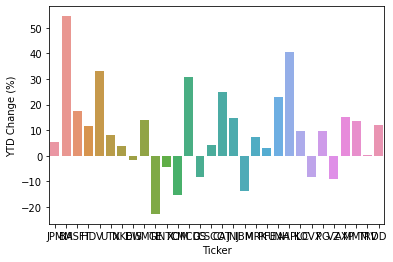

In [31]:
sns.barplot(data = df_dowJ, x ='Ticker', y = 'YTD Change (%)');

In [32]:
#si pero esto la verdad no me ayuda mucho por el ticker. 

df_dowB = df_dowJ[df_dowJ['Price ($)']> 120]
df_dowB.head()

,Ticker,Company,Volume,Total Employees,Price ($),YTD Change (%),Dollar Volume ($),PY Price ($)
1,BA,Boeing,"3,535,465","174,225",240.49,54.48,"850,243,977.85",155.68
3,HD,Home Depot,"5,368,723","385,000",149.84,11.75,"804,449,454.32",134.09
12,MCD,McDonaldÕs,"3,283,371","375,000",159.38,30.94,"523,303,669.98",121.72
13,GS,Goldman Sachs,"2,369,131","33,300",219.96,-8.14,"521,114,054.76",239.45
16,JNJ,Johnson & Johnson,"3,277,875","127,100",132.21,14.76,"433,367,853.75",115.21


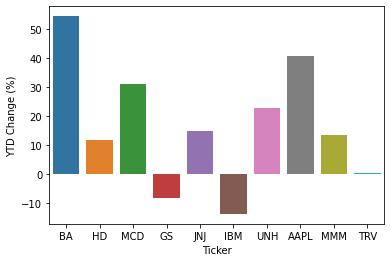

In [33]:
sns.barplot(data = df_dowB, x ='Ticker', y = 'YTD Change (%)');

In [34]:
df_dowS = df_dowJ[df_dowJ['Price ($)']< 50]
df_dowS.head()

,Ticker,Company,Volume,Total Employees,Price ($),YTD Change (%),Dollar Volume ($),PY Price ($)
9,GE,General Electric,"23,910,062","333,000",24.44,-22.66,"584,361,915.28",31.60
10,INTC,Intel,"15,843,668","106,700",34.73,-4.25,"550,250,589.64",36.27
14,CSCO,Cisco,"16,362,658","71,883",31.48,4.17,"515,096,473.84",30.22
19,PFE,Pfizer,"12,224,026","96,500",33.50,3.14,"409,504,871.00",32.48
22,KO,Coca-Cola,"7,762,162","146,200",45.45,9.62,"352,790,262.90",41.46


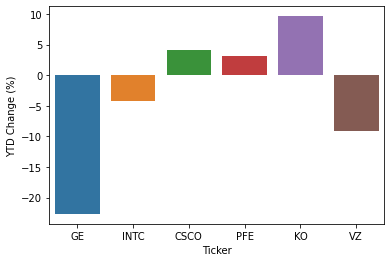

In [35]:
sns.barplot(data = df_dowS, x ='Ticker', y = 'YTD Change (%)');

In [36]:
df_dowJ.to_csv('DowClean.csv')

#PARA cambiar columna 

#df_dowJ = dj_dowJ.astype({'nombre columna':'str'}) #dato que necesitas transormar